In [17]:


import seaborn as sns
import pandas as pd
import numpy as np
import re
import string


from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, GRU, Dense
from keras.utils import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

# using a pre trained model
MODEL_NAME = 'bert-base-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)



#load datset
df = pd.read_csv('Hepsiburada-product-comments.csv', encoding='utf-8-sig')
df.columns = ['product name','comment','rating','likes','dislikes' ]
print(df.shape)
print(df.head())



RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
No module named 'keras.saving.hdf5_format'

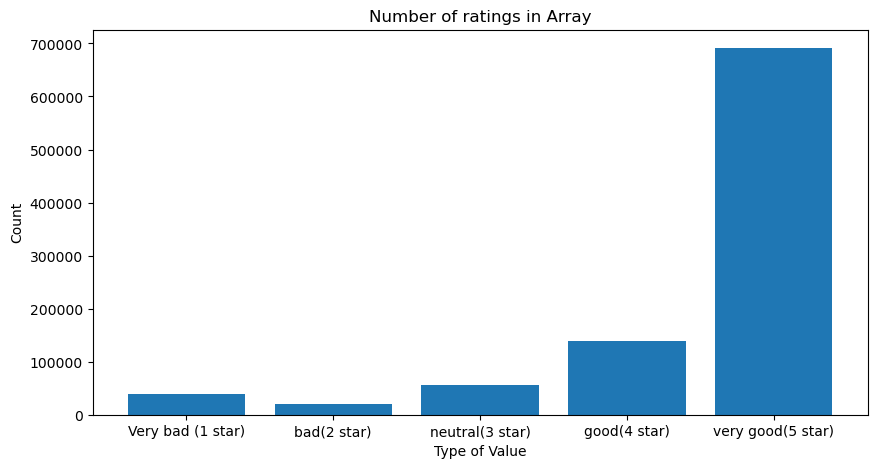

In [ ]:
num_Verybad= np.count_nonzero(df['rating'] == 1)
num_bad = np.count_nonzero(df['rating'] == 2)
num_neu = np.count_nonzero(df['rating'] == 3)
num_good = np.count_nonzero(df['rating'] == 4)
num_Verygood =np.count_nonzero(df['rating'] == 5)

labels = ['Very bad (1 star)', 'bad(2 star)' , 'neutral(3 star)', 'good(4 star)', 'very good(5 star)']
values = [num_Verybad, num_bad,num_neu,num_good,num_Verygood]

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(labels, values)

plt.title('Number of ratings in Array')
plt.xlabel('Type of Value')
plt.ylabel('Count')

plt.show()

In [ ]:
df['rating'].value_counts()

5    691280
4    138570
3     56719
1     39369
2     21092
Name: rating, dtype: int64

In [ ]:
df.drop(df[df["rating"] == 3].index, inplace = True) # remove neutral for more accuracy
df['rating'].value_counts()


5    691280
4    138570
1     39369
2     21092
Name: rating, dtype: int64

In [ ]:
# 0 for bad review and 1 for good review
df["rating"] = df["rating"].replace(1, 0)
df["rating"] = df["rating"].replace(2, 0)
df["rating"] = df["rating"].replace(4, 1)
df["rating"] = df["rating"].replace(5, 1)
df["rating"].value_counts()

1    829850
0     60461
Name: rating, dtype: int64

In [ ]:
# to lower case all the comments for better processing
df['comment'] = df['comment'].astype(str)
df['comment'] = np.char.mod('%s', df['comment'].str.lower())
df.head()


,product name,comment,rating,likes,dislikes
0,Uno Flip,"merhaba, \ndaha önce yapmış olduğum yorumda ka...",1,3,1
1,Uno Flip,gayet güzel hızlı geldi,1,4,4
2,Uno Flip,klasik ve diğer uno da gayet güzeldi bu da çok...,1,8,2
3,Uno Flip,"kart ile alakalı bir iki defo sorunu vardı, yo...",1,0,0
4,Uno Flip,acayip eğlenceli orjinal uno nun bir türü eğle...,1,8,3


In [ ]:
# remove \n with ' '
df["comment"] = df["comment"].apply(lambda x: x.replace("\n", " "))
df.head()

,product name,comment,rating,likes,dislikes
0,Uno Flip,"merhaba, daha önce yapmış olduğum yorumda kar...",1,3,1
1,Uno Flip,gayet güzel hızlı geldi,1,4,4
2,Uno Flip,klasik ve diğer uno da gayet güzeldi bu da çok...,1,8,2
3,Uno Flip,"kart ile alakalı bir iki defo sorunu vardı, yo...",1,0,0
4,Uno Flip,acayip eğlenceli orjinal uno nun bir türü eğle...,1,8,3


In [ ]:
#spliting the data 
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['comment'].values)
y = df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Train a logistic regression model on the training data
#model = LogisticRegression()
#model.fit(X_train, y_train)
model.compile(optimizer='adam', 
              loss='binary_Crossentropy', 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2)
# Evaluate the performance of the model on the testing data
y_pred = model.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'compile'

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

Accuracy: 96.84%
Precision: 97.28%
Recall: 99.38%
F1-score: 98.32%
